## EXPLORATORY DATA ANALYSIS OF LOAN DATA

In [1]:
## Importing neccessary python libraries for Exploratory Data Analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook")

In [2]:
appdata = pd.read_csv("application_data.csv") # loading "application_data.csv" as pandas dataframe object.

#### First we will analyze the application_data dataset.

In [3]:
appdata.shape # Checking the shape i.e. no. of rows and columns in the dataframe.

(307511, 122)

This shows that the dataset has 307511 rows and 122 columns.

In [4]:
appdata.head(5) # Checking the first 5 rows of dataset.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
appdata.tail(5) # Checking the last 5 rows of dataset.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [6]:
appdata.columns # Checking the column header names. There are total 122 column headers.

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


This shows that the datatypes present in the dataframe are only float, int and object type. However, we can easily see from the column descriptions that
there are a no. of columns containing categorical data. We will convert the column dtype according to type of data it contains, but first we will get rid of the 
NA values present in the dataset.

### Data Cleaning

There are total 122 columns and in many of the columns large no. of data points are missing. Let's find out the percentage of data missing in each column.

In [8]:
percent_missing = appdata.isna().mean().round(4) * 100

In [9]:
percent_missing.sort_values(ascending=False) # This shows columnwise percentage of missing values in Descending order.

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

We will delete all the columns having missing value percentage of 50% or more, as due to huge amount of missing values these columns will not reperesent actual scenario of the dataset and can mislead/give inappropriate results not valuable for EDA.

In [10]:
columns_to_delete = percent_missing[percent_missing >= 50].index
columns_to_delete
# Showing the column name where the percentage of missing value is greater than or eaqual to 50%.

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [11]:
appdata.drop(columns_to_delete, axis=1, inplace=True) # Deleting all those columns having more than 50% missing data from the dataframe.

In [12]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [13]:
appdata.shape 

(307511, 81)

Hence we have removed 41 columns from the dataframe where more than 20% data was missing.

Again let's check the dataset for missing values greater than 13%.

In [14]:
percent_missing = appdata.isna().mean().round(4) * 100

In [15]:
percent_missing[percent_missing > 13].sort_values(ascending=False)

FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_AVG     48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
dtype: float64

In [16]:
appdata['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
appdata['OCCUPATION_TYPE'].isnull().value_counts()

False    211120
True      96391
Name: OCCUPATION_TYPE, dtype: int64

We can see that 96391 values are missing. However, since it's a categorical column, we can't impute the NA values by mean, median or mode. Also, this column is also not present in the previous_application dataset.

In [18]:
appdata['EXT_SOURCE_3'].describe().round(2)

count    246546.00
mean          0.51
std           0.19
min           0.00
25%           0.37
50%           0.54
75%           0.67
max           0.90
Name: EXT_SOURCE_3, dtype: float64

'EXT_SOURCE_3' column contains approx. 20% missing values with mean and median value 0.51 and 0.54 respectively. let's fill the missing values with either mean or median value. I will fill with median as it seems a better measure of central tendency for this slightly left skewed distribution. 

In [19]:
appdata['EXT_SOURCE_3'] = appdata['EXT_SOURCE_3'].fillna(appdata['EXT_SOURCE_3'].median())

For other columns the amount of missing values are almost 50%, hence even though we have not deleted the columns, these columns won't produce any significant insights about the dataset.

In [20]:
appdata['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [21]:
appdata['AMT_REQ_CREDIT_BUREAU_DAY'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [22]:
appdata['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [23]:
appdata['AMT_REQ_CREDIT_BUREAU_MON'].unique()

array([ 0., nan,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16.,
       12., 14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

In [24]:
appdata['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [25]:
appdata['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

For all the above 6 columns filling the nan value with any of the central measure cannot be justifiable, hence we will keep the fields as NaN values only. One important insight in 'AMT_REQ_CREDIT_BUREAU_QRT' column in 261 No. of enquiries to the credit bureau 3 months before the application. Let's dive deeper in these case.

In [26]:
appdata[appdata['AMT_REQ_CREDIT_BUREAU_QRT'] == 261]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
239474,377322,0,Cash loans,F,N,Y,1,360000.0,1035000.0,30393.0,...,0,0,0,0,0.0,0.0,0.0,1.0,261.0,0.0


This looks unusual that only for 1 client there were 261 No. of enquiries made to the credit bureau 3 months before the application, seems like an outlier to me.

In [27]:
percent_missing = appdata.isnull().sum() * 100 / len(appdata)
percent_missing[(percent_missing <= 13) & (percent_missing > 0)].sort_values(ascending=False)

NAME_TYPE_SUITE             0.420148
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [28]:
appdata.NAME_TYPE_SUITE.head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

Since it's a categorical data we can't impute missing values with any central measure (mean, median or mode).

In [29]:
print(appdata.DEF_60_CNT_SOCIAL_CIRCLE.describe())
print(appdata.OBS_60_CNT_SOCIAL_CIRCLE.describe())
print(appdata.DEF_60_CNT_SOCIAL_CIRCLE.describe())
print(appdata.OBS_60_CNT_SOCIAL_CIRCLE.describe())

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


We will impute zero in all four Social Circle Column as the median is 0 and mean is not the right measure for central tendency in a skewed distribution.

In [30]:
appdata.DEF_60_CNT_SOCIAL_CIRCLE=appdata.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0)
appdata.OBS_60_CNT_SOCIAL_CIRCLE=appdata.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0)
appdata.DEF_60_CNT_SOCIAL_CIRCLE=appdata.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0)
appdata.OBS_60_CNT_SOCIAL_CIRCLE=appdata.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0)

In [31]:
print(appdata.EXT_SOURCE_2.describe().round(2))
print(appdata.AMT_GOODS_PRICE.describe().round(2))
print(appdata.AMT_ANNUITY.describe().round(2))
print(appdata.CNT_FAM_MEMBERS.describe().round(2))
print(appdata.DAYS_LAST_PHONE_CHANGE.describe().round(2))

count    306851.00
mean          0.51
std           0.19
min           0.00
25%           0.39
50%           0.57
75%           0.66
max           0.85
Name: EXT_SOURCE_2, dtype: float64
count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64
count    307499.00
mean      27108.57
std       14493.74
min        1615.50
25%       16524.00
50%       24903.00
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64
count    307509.00
mean          2.15
std           0.91
min           1.00
25%           2.00
50%           2.00
75%           3.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64
count    307510.00
mean       -962.86
std         826.81
min       -4292.00
25%       -1570.00
50%        -757.00
75%        -274.00
max           0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


We will impute the median value in all the columns mentioned above with the median value since for a skewed distribution, median seems to be a better measure of central tendency.

In [32]:
appdata.EXT_SOURCE_2=appdata.EXT_SOURCE_2.fillna(appdata.EXT_SOURCE_2.median())
appdata.AMT_GOODS_PRICE=appdata.AMT_GOODS_PRICE.fillna(appdata.AMT_GOODS_PRICE.median())
appdata.AMT_ANNUITY=appdata.AMT_ANNUITY.fillna(appdata.AMT_ANNUITY.median())
appdata.CNT_FAM_MEMBERS=appdata.CNT_FAM_MEMBERS.fillna(appdata.CNT_FAM_MEMBERS.median())
appdata.DAYS_LAST_PHONE_CHANGE=appdata.DAYS_LAST_PHONE_CHANGE.fillna(appdata.DAYS_LAST_PHONE_CHANGE.median())


In [33]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307511 non-null float64
AMT_GOODS_PRICE                 307511 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [34]:
appdata['FLAG_OWN_REALTY'] = appdata['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})


In [35]:
appdata['FLAG_OWN_CAR'] = appdata['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
appdata.EMERGENCYSTATE_MODE = appdata.EMERGENCYSTATE_MODE.replace({'Yes':1,'No':0})

In [36]:
appdata['FLAG_OWN_CAR'] = appdata['FLAG_OWN_CAR'].fillna(0).astype(int)
appdata['FLAG_OWN_REALTY'] = appdata['FLAG_OWN_REALTY'].fillna(0).astype(int)
appdata.DAYS_REGISTRATION = appdata.DAYS_REGISTRATION.fillna(0).astype(int)
appdata.CNT_FAM_MEMBERS = appdata.CNT_FAM_MEMBERS.fillna(0).astype(int)
appdata.YEARS_BEGINEXPLUATATION_AVG = appdata.YEARS_BEGINEXPLUATATION_AVG.fillna(0).astype(int)
appdata.YEARS_BEGINEXPLUATATION_MEDI = appdata.YEARS_BEGINEXPLUATATION_MEDI.fillna(0).astype(int)
appdata.YEARS_BEGINEXPLUATATION_MODE = appdata.YEARS_BEGINEXPLUATATION_MODE.fillna(0).astype(int)
appdata.FLOORSMAX_MEDI = appdata.FLOORSMAX_MEDI.fillna(0).astype(int)
appdata.OBS_30_CNT_SOCIAL_CIRCLE=appdata.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0).astype(int)
appdata.DEF_30_CNT_SOCIAL_CIRCLE =  appdata.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0).astype(int)      
appdata.OBS_60_CNT_SOCIAL_CIRCLE = appdata.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0).astype(int)      
appdata.DEF_60_CNT_SOCIAL_CIRCLE = appdata.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0).astype(int)        
appdata.DAYS_LAST_PHONE_CHANGE = appdata.DAYS_LAST_PHONE_CHANGE.fillna(0).astype(int)
appdata.EMERGENCYSTATE_MODE = appdata.EMERGENCYSTATE_MODE.fillna(0).astype(int)


##### Now, we will change the dtype of variables as per the data types they contain.

In [37]:
categorical_column = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                     'OCCUPATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
                     'ORGANIZATION_TYPE','NAME_CONTRACT_TYPE','NAME_TYPE_SUITE']


In [38]:
for i in categorical_column:
    appdata[i] = appdata[i].astype("category")

In [39]:
appdata['SK_ID_CURR'] = appdata['SK_ID_CURR'].astype("object") # Converting 'SK_ID_CURR' as object dtype.

In [40]:
appdata['TARGET'].unique()

array([1, 0])

In [41]:
appdata['NAME_CONTRACT_TYPE'].unique()

[Cash loans, Revolving loans]
Categories (2, object): [Cash loans, Revolving loans]

In [42]:
appdata['CODE_GENDER'].unique()

[M, F, XNA]
Categories (3, object): [M, F, XNA]

In [43]:
appdata[appdata['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,1,1,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,0,1,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,0,1,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,1,1,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


Here XNA is basically invalid values hence we will convert the type as np.nan.The no. of rows having CODE_GENDER == XNA are 4 only and can be deleted also, however since NA value is creating any disturbances in EDA we will impute nan in place of XNA.

In [44]:
appdata.loc[appdata['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan

In [45]:
appdata['CODE_GENDER'].unique() # Showing unique values in Gender field.

[M, F, NaN]
Categories (2, object): [M, F]

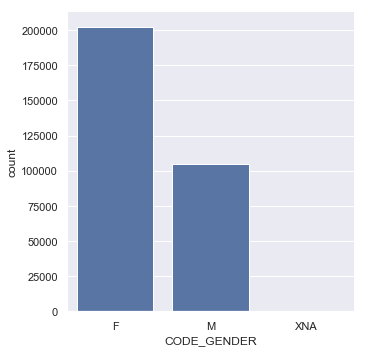

In [46]:
sns.catplot(x="CODE_GENDER", kind="count",color="b",data=appdata)

This shows the no. of male and female applicants in the dataset.

In [47]:
appdata['NAME_INCOME_TYPE'].unique() # Showing unique values in Income Type field.

[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]
Categories (8, object): [Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman, Maternity leave]

In [48]:
percent_income_type = appdata['NAME_INCOME_TYPE'].value_counts() * 100/len(appdata['NAME_INCOME_TYPE'])
percent_income_type.round(2)

Working                 51.63
Commercial associate    23.29
Pensioner               18.00
State servant            7.06
Unemployed               0.01
Student                  0.01
Businessman              0.00
Maternity leave          0.00
Name: NAME_INCOME_TYPE, dtype: float64

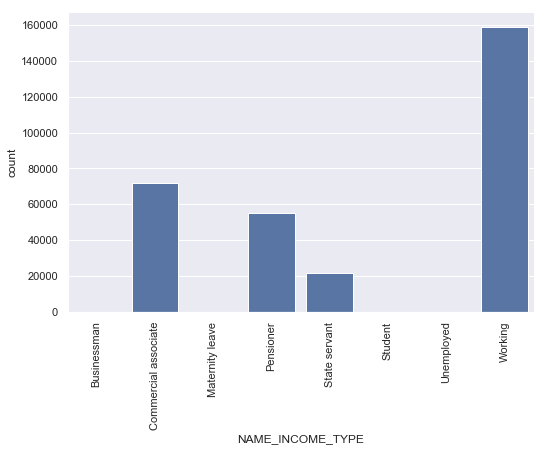

In [49]:
g = sns.catplot(x="NAME_INCOME_TYPE", kind="count",data=appdata,aspect=1.5,color="b")
g.set_xticklabels(rotation=90)

Majority (More than half) of client applying for loan are from Working class, followed by Commercial associate and Pensioner.

In [50]:
appdata['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

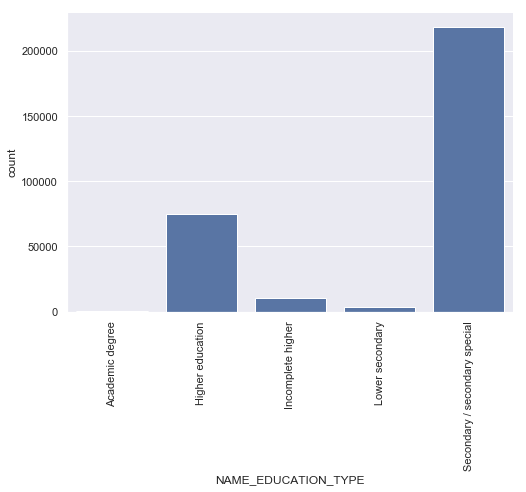

In [51]:
g = sns.catplot(x="NAME_EDUCATION_TYPE", kind="count",data=appdata,aspect=1.5,color="b")
g.set_xticklabels(rotation=90)

In [52]:
appdata['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

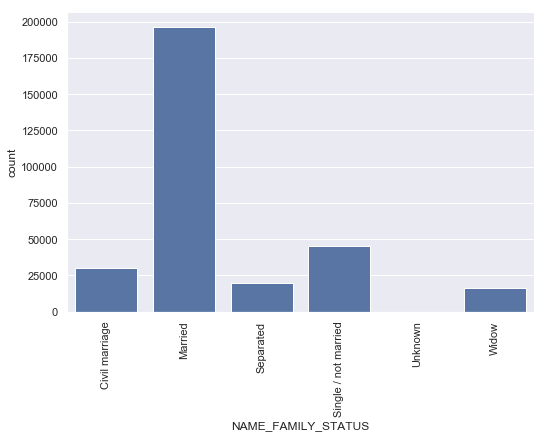

In [53]:
g = sns.catplot(x="NAME_FAMILY_STATUS", kind="count",data=appdata,aspect=1.5,color="b")
g.set_xticklabels(rotation=90)

In [54]:
appdata['DAYS_BIRTH'].head() 
# This shows clients age in days at the time of application. However it's negative. Let's convert the same in years.

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [55]:
appdata['AGE_APPL'] = (appdata['DAYS_BIRTH']/365).apply(np.floor).transform(np.abs).astype('int64') # Applicant's age at the time of Application.
appdata= appdata.drop('DAYS_BIRTH', axis=1)


In [56]:
appdata['AGE_APPL'].head()

0    26
1    46
2    53
3    53
4    55
Name: AGE_APPL, dtype: int64

In [57]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_APPL
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55


In [58]:
appdata.AMT_CREDIT.dtype

dtype('float64')

Let's create a column "Tenure" showing the tenure of loan by dividing AMT_CREDIT by AMT_ANNUITY.

In [59]:
appdata['TENURE'] = (appdata.AMT_CREDIT / appdata.AMT_ANNUITY).apply(np.floor)

In [60]:
appdata['TENURE']=appdata['TENURE'].astype(int)

In [61]:
appdata.NAME_TYPE_SUITE.unique()

[Unaccompanied, Family, Spouse, partner, Children, Other_A, NaN, Other_B, Group of people]
Categories (7, object): [Unaccompanied, Family, Spouse, partner, Children, Other_A, Other_B, Group of people]

In [62]:
appdata.EMERGENCYSTATE_MODE.unique()

array([0, 1])

#### New Let's focus on columns with Numeric Values.

In [63]:
appdata.select_dtypes(include=np.number).head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_APPL,TENURE
0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,16
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,36
2,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,20
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,10
4,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,23


In [64]:
appdata['DAYS_EMPLOYED']=appdata['DAYS_EMPLOYED'].abs()
appdata['DAYS_REGISTRATION']=appdata['DAYS_REGISTRATION'].abs()
appdata['DAYS_ID_PUBLISH']=appdata['DAYS_ID_PUBLISH'].abs()
appdata['DAYS_LAST_PHONE_CHANGE']=appdata['DAYS_LAST_PHONE_CHANGE'].abs()

In [65]:
appdata.CNT_FAM_MEMBERS.unique()

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 20, 15, 16, 11])

In [66]:
appdata_num = appdata.select_dtypes(include=np.number)

In [67]:
appdata_num.head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_APPL,TENURE
0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,637,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,16
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,36
2,0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,225,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,20
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,3039,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,10
4,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,3038,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,23


Let's find outliers for 'AMT_INCOME_TOTAL', 'AMT_CREDIT','DAYS_EMPLOYED','AGE_APPL' columns.

In [68]:
appdata_num_selected = appdata.loc[:,['AMT_INCOME_TOTAL', 'AMT_CREDIT','DAYS_EMPLOYED','AGE_APPL']]

In [69]:
appdata_num_selected.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,AGE_APPL
0,202500.0,406597.5,637,26
1,270000.0,1293502.5,1188,46
2,67500.0,135000.0,225,53
3,135000.0,312682.5,3039,53
4,121500.0,513000.0,3038,55


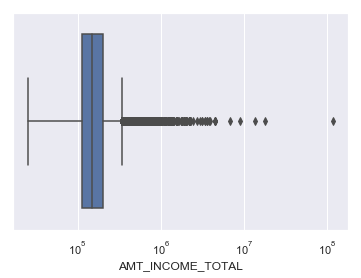

In [70]:
# Plotting boxplot for "AMT_INCOME_TOTAL" column to see the outliers
ax = sns.boxplot(appdata.AMT_INCOME_TOTAL)
ax.set_xscale("log")

This rightmost dots showing more tha 1L income clearly shows outliers in the boxplot shown above. 

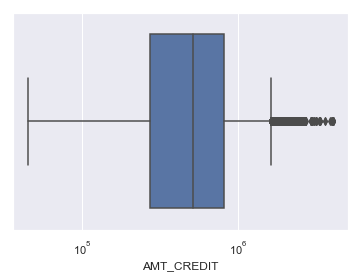

In [71]:
ax = sns.boxplot(appdata.AMT_CREDIT)
ax.set_xscale("log")

Here also the outlier is visible in the boxplot, however the values are not visible.

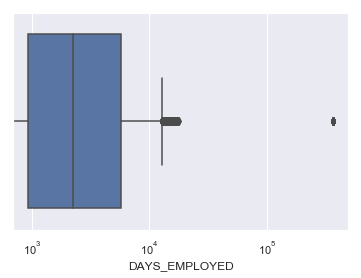

In [72]:
ax = sns.boxplot(appdata.DAYS_EMPLOYED)
ax.set_xscale("log")

Here also the outlier is clearly visible showing more than 1L days.Median and maximum no. of days employed falls in the range of 1000 to 6000 days.

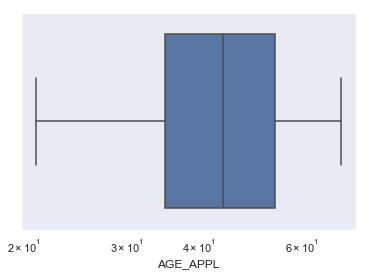

In [73]:
ax = sns.boxplot(appdata.AGE_APPL)
ax.set_xscale("log")

Let's find outlier in "AMT_INCOME_TOTAL", "DAYS_EMPLOYED" and "AMT_CREDIT" columns separately using Inter Quantile range method.

In [74]:
Q1 = appdata_num_selected.quantile(0.25)
Q3 = appdata_num_selected.quantile(0.75)
IQR = Q3 - Q1
IQR

AMT_INCOME_TOTAL     90000.0
AMT_CREDIT          538650.0
DAYS_EMPLOYED         4774.0
AGE_APPL                19.0
dtype: float64

In [75]:
outlier_data = (appdata_num_selected < (Q1 - 1.5 * IQR)) |(appdata_num_selected > (Q3 + 1.5 * IQR))

In [76]:
outlier_data.sum(axis=0)

AMT_INCOME_TOTAL    14035
AMT_CREDIT           6562
DAYS_EMPLOYED       56357
AGE_APPL                0
dtype: int64

This shows the number of outliers in each column.

In [77]:
outlier_AMT_INCOME_TOTAL = appdata_num_selected[(outlier_data.AMT_INCOME_TOTAL == True)]["AMT_INCOME_TOTAL"]
outlier_AMT_CREDIT = appdata_num_selected[(outlier_data.AMT_CREDIT == True)]["AMT_CREDIT"]
outlier_DAYS_EMPLOYED = appdata_num_selected[(outlier_data.DAYS_EMPLOYED == True)]["DAYS_EMPLOYED"]


In [78]:
print(outlier_AMT_INCOME_TOTAL.sort_values(ascending=False).head(10))
print(outlier_AMT_CREDIT.sort_values(ascending=False).head(10))
print(outlier_DAYS_EMPLOYED.sort_values(ascending=False).head(10))

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
187833      4500000.0
204564      4500000.0
103006      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64
110459    4050000.0
133766    4050000.0
288455    4050000.0
14852     4050000.0
287732    4050000.0
120757    4050000.0
17948     4050000.0
119681    4050000.0
95571     4031032.5
186230    4027680.0
Name: AMT_CREDIT, dtype: float64
307507    365243
104255    365243
104293    365243
104287    365243
104286    365243
104282    365243
104279    365243
104273    365243
104272    365243
104264    365243
Name: DAYS_EMPLOYED, dtype: int64


Let's remove all the outliers from the dataset.

In [79]:
appdata = appdata[~(outlier_data).any(axis=1)]

# removed all the outlier data from three numerical columns mentioned above.

In [80]:
appdata.shape 
# No. of rows reduced to 2.34L now.

(234188, 82)

### Binning of Continuous Variables

##### Here we will create binning of 2 continuous variables 1. AGE_APPL (i.e. age of applicant), 2. TENURE (loan tenure in month)

In [81]:
groups = pd.qcut(appdata['AGE_APPL'], 10).value_counts().sort_index()

Text(0.5, 1.0, 'Distribution of Age')

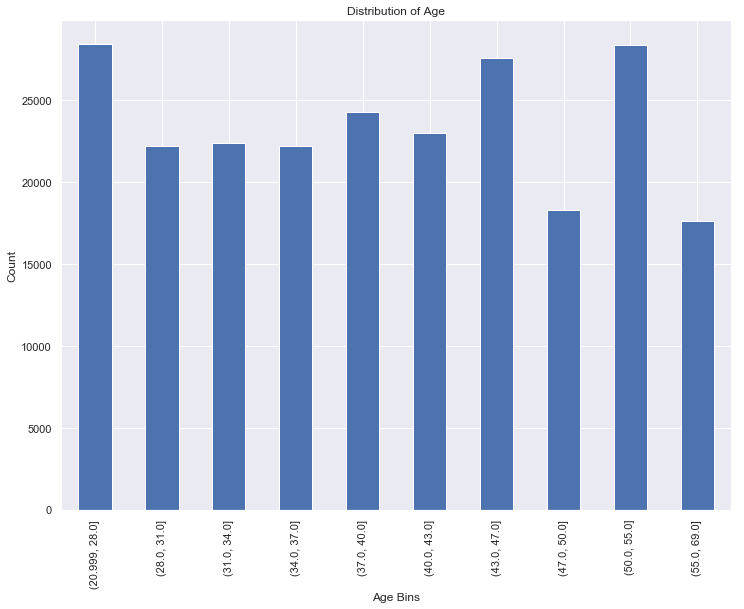

In [82]:
# Plotting countplot of Age of Applicants.
plt.figure(figsize=(12,9))
groups.plot(kind="bar")
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.title("Distribution of Age")

In [83]:
groups_tenure = pd.qcut(appdata['TENURE'], [0,0.25,0.5,0.75,1]).value_counts().sort_index()

In [84]:
groups_tenure

(5.999, 15.0]    61858
(15.0, 20.0]     79449
(20.0, 26.0]     38246
(26.0, 59.0]     54635
Name: TENURE, dtype: int64

Text(0.5, 1.0, 'Distribution of Loan Tenure')

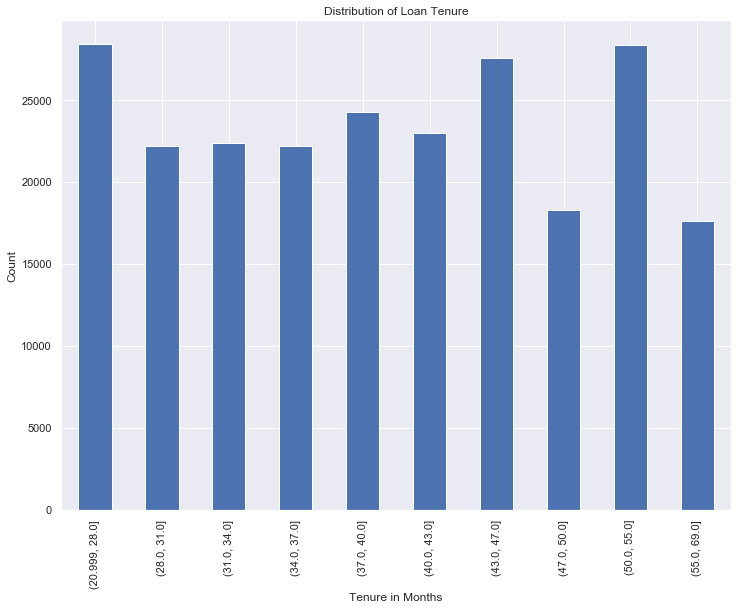

In [85]:
# Plotting countplot of Loan Tenure.
plt.figure(figsize=(12,9))
groups.plot(kind="bar")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.title("Distribution of Loan Tenure")

### Analysis

#### Checking the Imbalance Percentage

In [86]:
imbalance = round(appdata['TARGET'].mean() * 100,2)

In [87]:
imbalance 

8.91

The data imbalance percentage is around 8.9%.

#### Dividing data based on TARGET

In [88]:
target1 = appdata[appdata.TARGET == 1]

In [89]:
target0 = appdata[appdata.TARGET == 0]

### Univariate Analysis for TARGET = 1 Set & Target = 0 Sets

In [90]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_APPL,TENURE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,16
26,100031,1,Cash loans,F,0,1,0,112500.0,979992.0,27076.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,52,36
40,100047,1,Cash loans,M,0,1,0,202500.0,1193580.0,35028.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,34
42,100049,1,Cash loans,F,0,0,0,135000.0,288873.0,16258.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,17
94,100112,1,Cash loans,M,1,1,0,315000.0,953460.0,64107.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,28,14


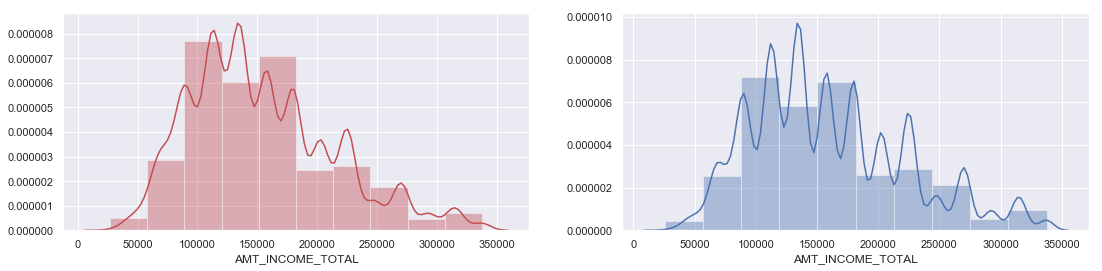

In [91]:
fig, ax =plt.subplots(1,2)
sns.distplot(target1.AMT_INCOME_TOTAL, bins=10, color="r", ax=ax[0])
sns.distplot(target0.AMT_INCOME_TOTAL, bins=10, color="b", ax=ax[1])
plt.subplots_adjust(right=2.5)

##### Applicant with income range 1L to 1.25L are more likely to be defaulter in clearing the loan. Second income group wehre there are chances of defaulter is in the income range of 1.5L to 1.75L.

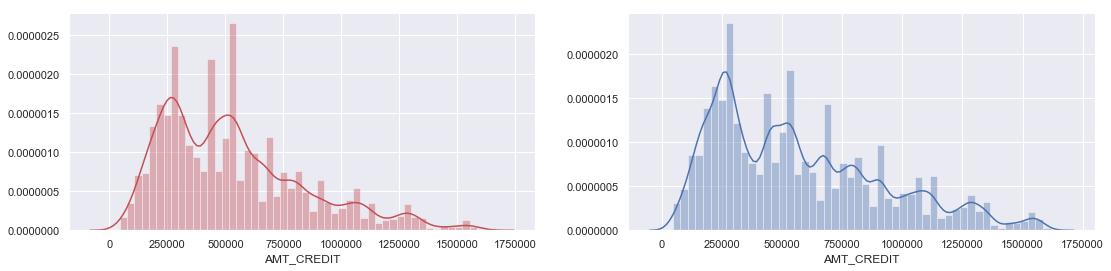

In [92]:
fig, ax =plt.subplots(1,2)
sns.distplot(target1.AMT_CREDIT,color="r", ax=ax[0])
sns.distplot(target0.AMT_CREDIT,color="b", ax=ax[1])
plt.subplots_adjust(right=2.5)

##### more Applicants taking loan in the 2.5L and 5.0L are falling in defaulter category. Applicants taking higher value loan are less likely to be defaulters.

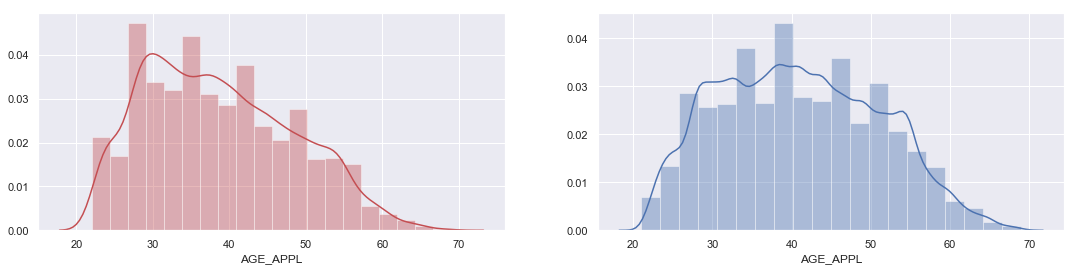

In [93]:
fig, ax =plt.subplots(1,2)
sns.distplot(target1.AGE_APPL,bins=20,color="r", ax=ax[0])
sns.distplot(target0.AGE_APPL,bins=20,color="b", ax=ax[1])
plt.subplots_adjust(right=2.5)

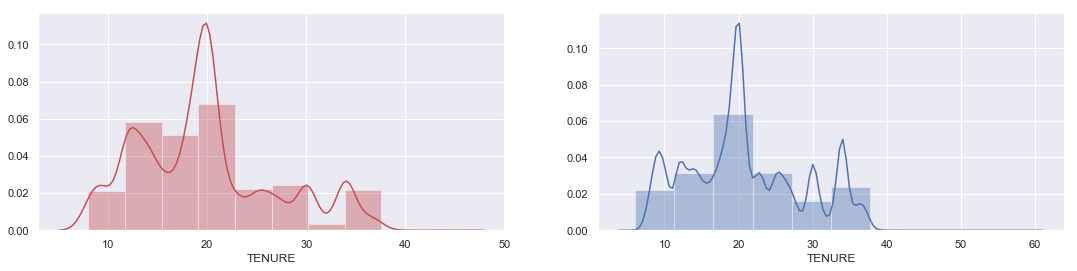

In [94]:
fig, ax =plt.subplots(1,2)
sns.distplot(target1.TENURE,bins=10,color="r", ax=ax[0])
sns.distplot(target0.TENURE,bins=10,color="b", ax=ax[1])
plt.subplots_adjust(right=2.5)

##### Applicants in defaulter list have taken loan for shorter period max. in 20 months range.

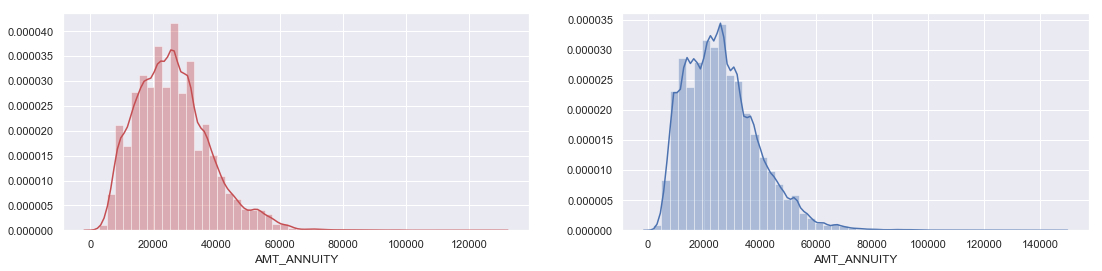

In [95]:
fig, ax =plt.subplots(1,2)
sns.distplot(target1.AMT_ANNUITY,color="r", ax=ax[0])
sns.distplot(target0.AMT_ANNUITY,color="b", ax=ax[1])
plt.subplots_adjust(right=2.5)

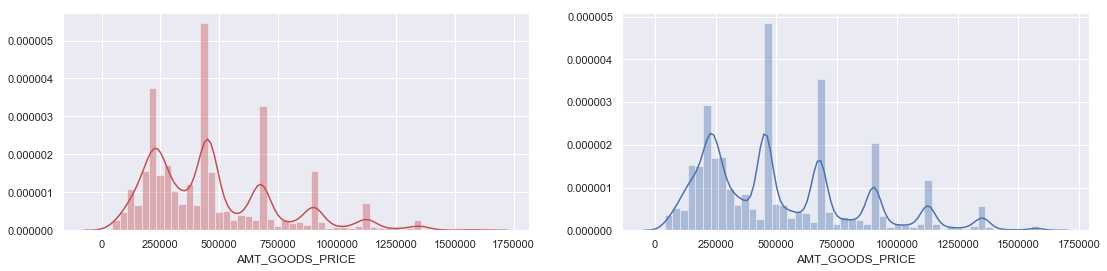

In [96]:
fig, ax =plt.subplots(1,2)
sns.distplot(target1.AMT_GOODS_PRICE,color="r", ax=ax[0])
sns.distplot(target0.AMT_GOODS_PRICE,color="b", ax=ax[1])
plt.subplots_adjust(right=2.5)

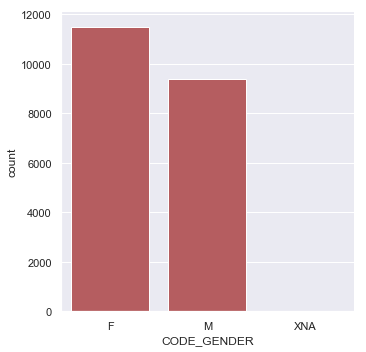

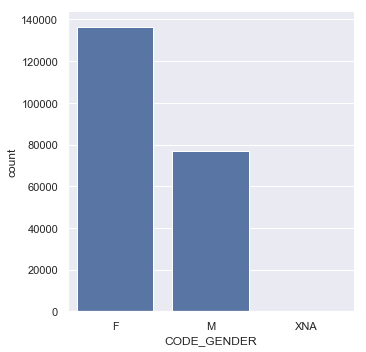

In [97]:
sns.catplot(x="CODE_GENDER", kind="count",color="r",data=target1)
sns.catplot(x="CODE_GENDER", kind="count",color="b",data=target0)

#### As already represented in the charts, ratio of male vs. female is more in defaulters set with target 1.Male applicants are more likely to be defaulters.

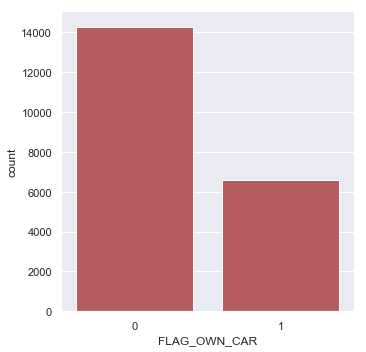

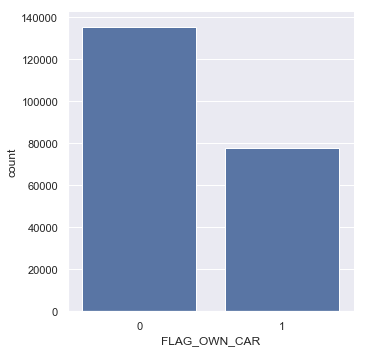

In [98]:
sns.catplot(x="FLAG_OWN_CAR", kind="count",color="r",data=target1)
sns.catplot(x="FLAG_OWN_CAR", kind="count",color="b",data=target0)

#### Applicants owing a car has less probability of being a defaulters, as there are more applicants having a car in non defaulters set.

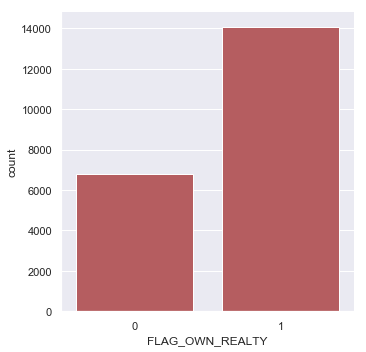

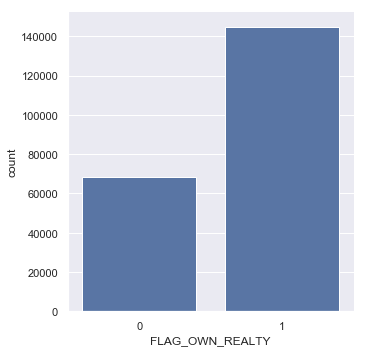

In [99]:
sns.catplot(x="FLAG_OWN_REALTY", kind="count",color="r",data=target1)
sns.catplot(x="FLAG_OWN_REALTY", kind="count",color="b",data=target0)

#### Owing a car has very less impact on applicant being a defaulter.

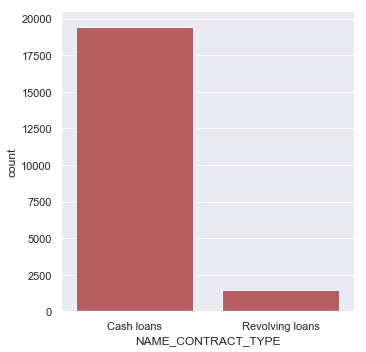

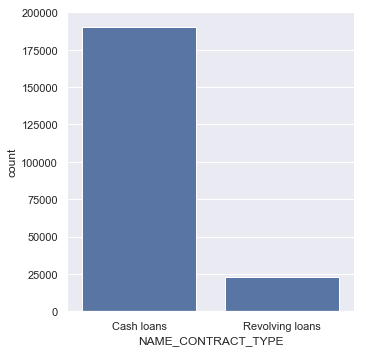

In [100]:
sns.catplot(x="NAME_CONTRACT_TYPE", kind="count",color="r",data=target1)
sns.catplot(x="NAME_CONTRACT_TYPE", kind="count",color="b",data=target0)

#### In case of revolving loan type chances of default is less.

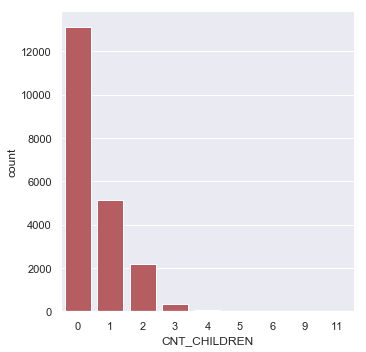

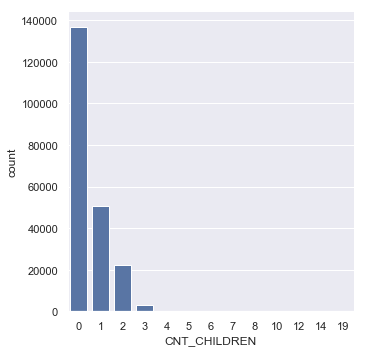

In [101]:
sns.catplot(x="CNT_CHILDREN", kind="count",color="r",data=target1)
sns.catplot(x="CNT_CHILDREN", kind="count",color="b",data=target0)

#### Having 1 or more child results in less chances of default.

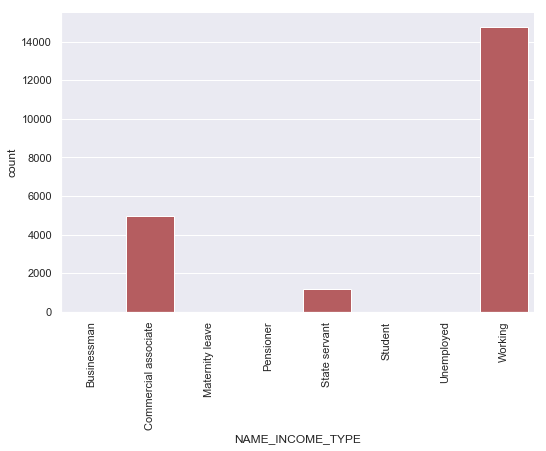

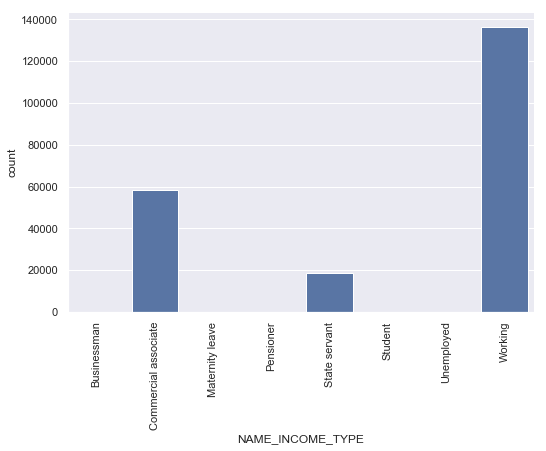

In [102]:
g = sns.catplot(x="NAME_INCOME_TYPE", kind="count",data=target1,aspect=1.5,color="r")
g.set_xticklabels(rotation=90)
h = sns.catplot(x="NAME_INCOME_TYPE", kind="count",data=target0,aspect=1.5,color="b")
h.set_xticklabels(rotation=90)

##### Majority of applicants are from Working class and Commercial Associates but being a commercial associates decreases the chances of being defaulter as the no. of defaulter are less compared to non defaulter in commercial associate segment.

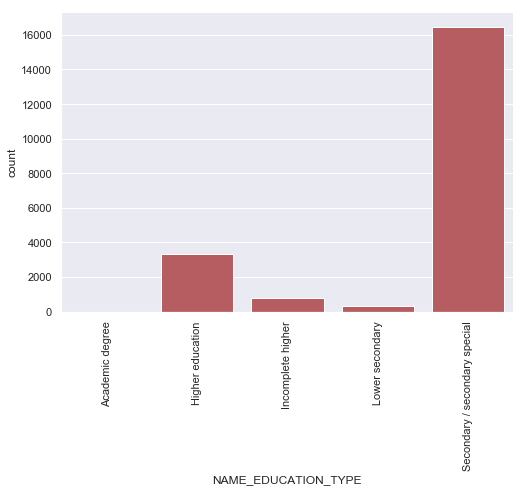

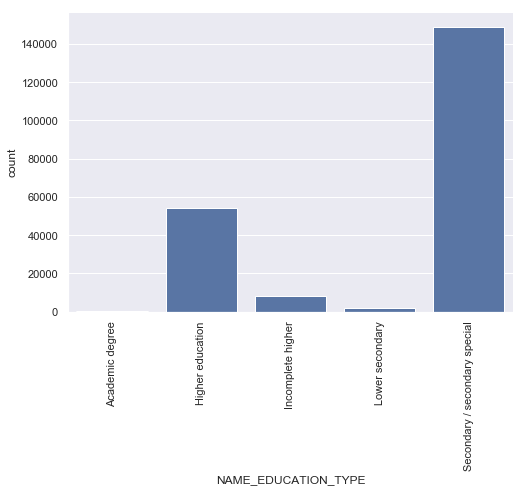

In [103]:
g = sns.catplot(x="NAME_EDUCATION_TYPE", kind="count",data=target1,aspect=1.5,color="r")
g.set_xticklabels(rotation=90)
h = sns.catplot(x="NAME_EDUCATION_TYPE", kind="count",data=target0,aspect=1.5,color="b")
h.set_xticklabels(rotation=90)

#### Applicants with higher education warrants low chances of default.

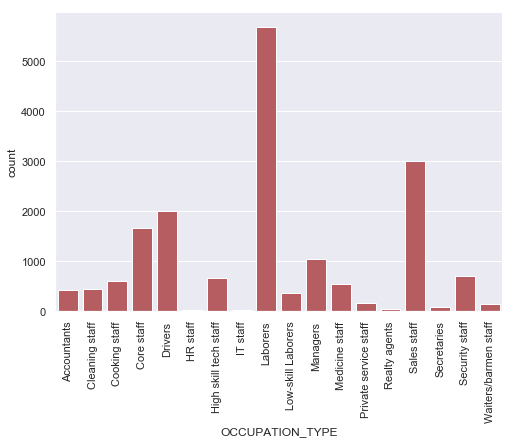

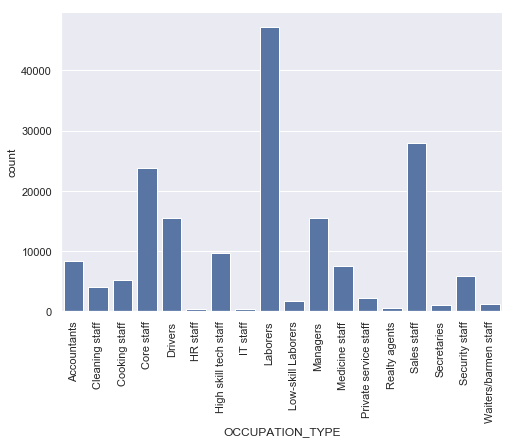

In [104]:
g = sns.catplot(x="OCCUPATION_TYPE", kind="count",data=target1,aspect=1.5,color="r")
g.set_xticklabels(rotation=90)
h = sns.catplot(x="OCCUPATION_TYPE", kind="count",data=target0,aspect=1.5,color="b")
h.set_xticklabels(rotation=90)

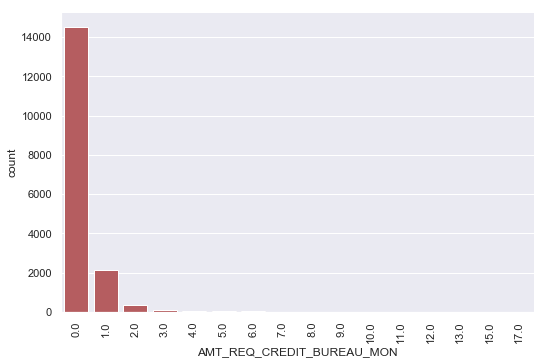

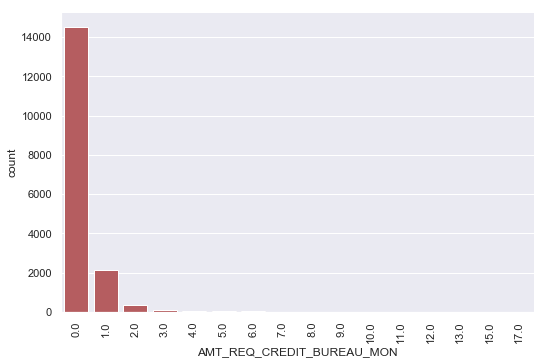

In [105]:
g = sns.catplot(x="AMT_REQ_CREDIT_BUREAU_MON", kind="count",data=target1,aspect=1.5,color="r")
g.set_xticklabels(rotation=90)
g = sns.catplot(x="AMT_REQ_CREDIT_BUREAU_MON", kind="count",data=target1,aspect=1.5,color="r")
g.set_xticklabels(rotation=90)

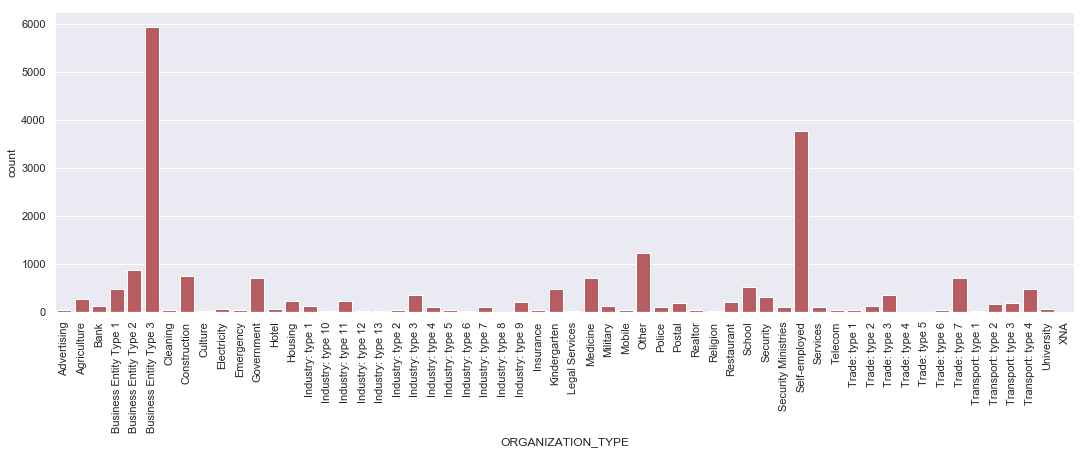

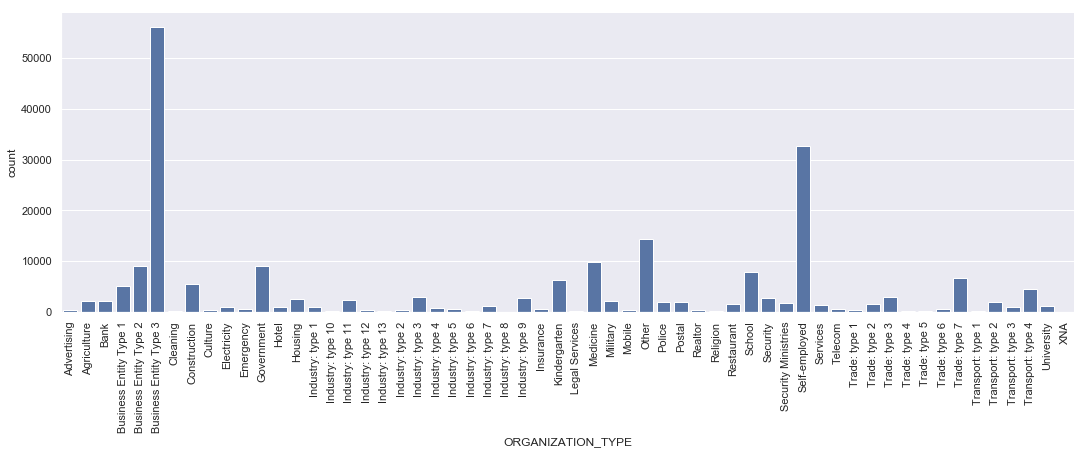

In [106]:
g = sns.catplot(x="ORGANIZATION_TYPE", kind="count",data=target1,aspect=3,color="r")
g.set_xticklabels(rotation=90)
h = sns.catplot(x="ORGANIZATION_TYPE", kind="count",data=target0,aspect=3,color="b")
h.set_xticklabels(rotation=90)

In [107]:
corr1 = target1.corr()
corr0 = target0.corr()

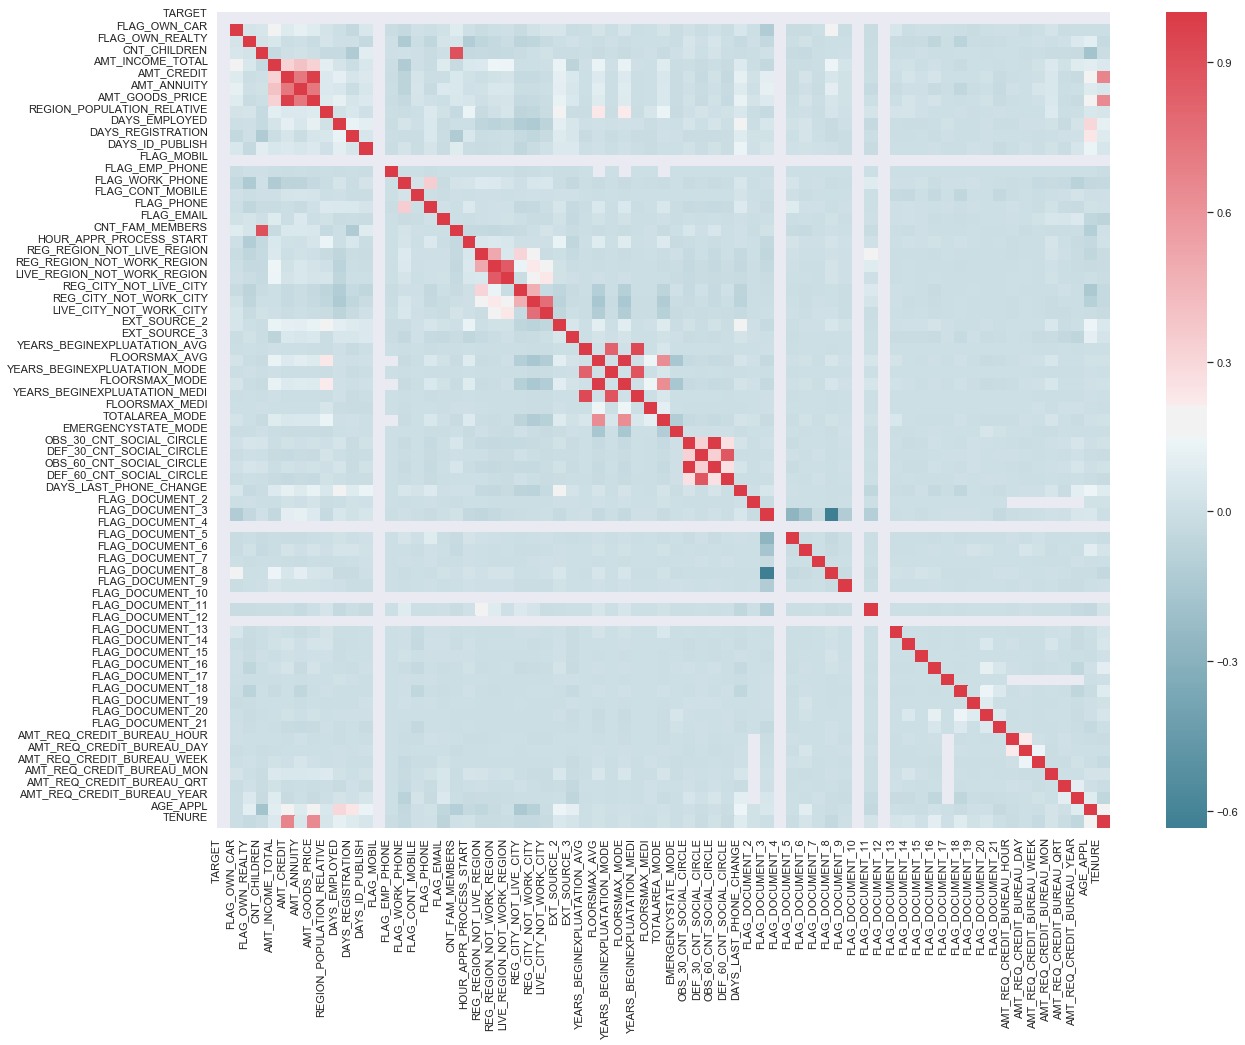

In [109]:
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 15))
    #Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr1, cmap=colormap)
    #Apply xticks
plt.xticks(range(len(corr1.columns)), corr1.columns);
    #Apply yticks
plt.yticks(range(len(corr1.columns)), corr1.columns)
    #show plot
plt.show()

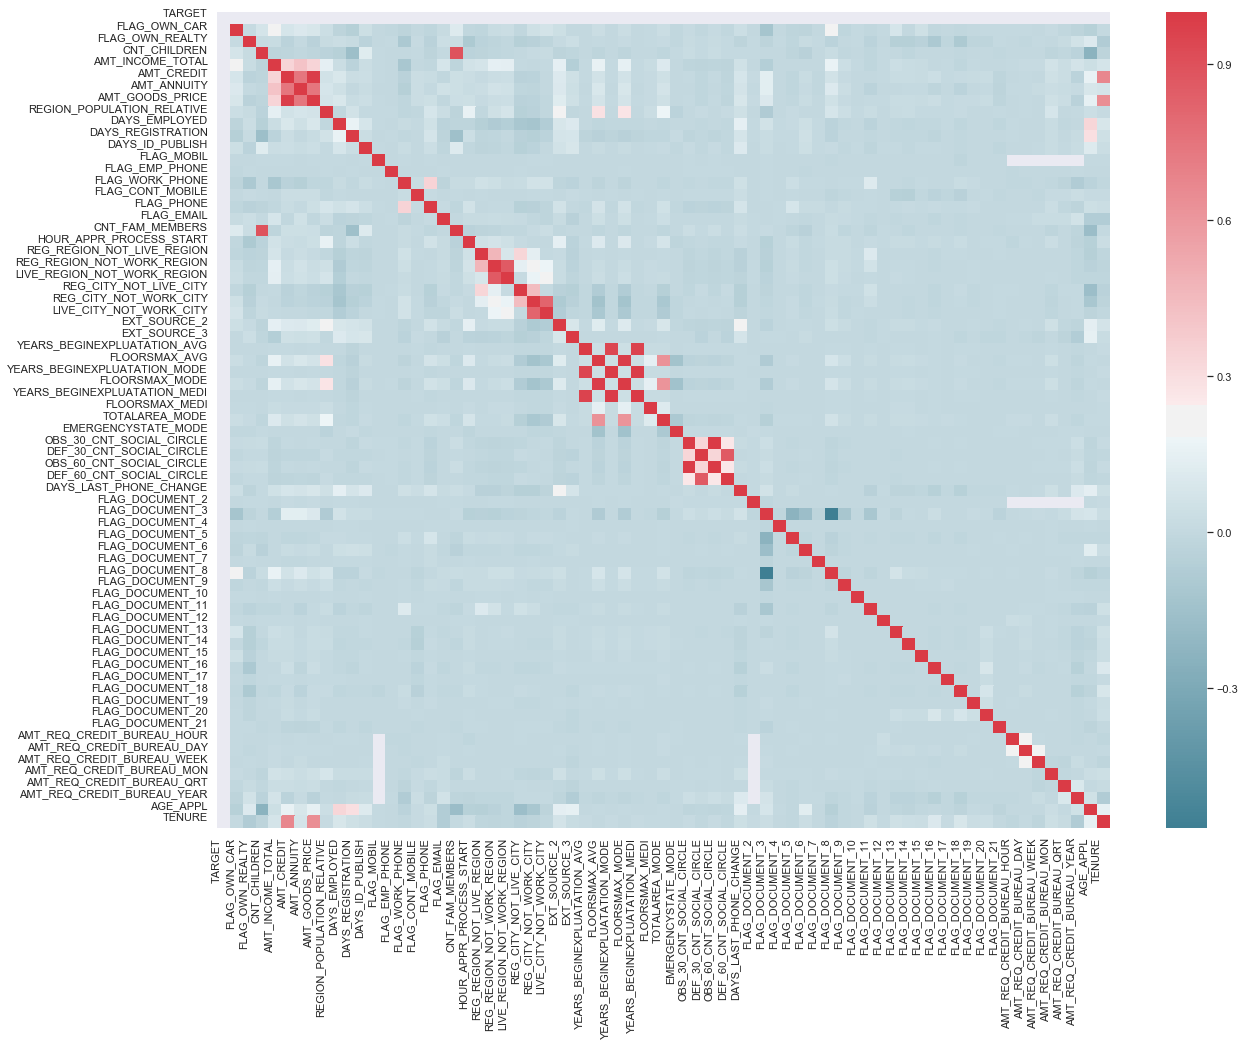

In [110]:
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 15))
    #Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr0, cmap=colormap)
    #Apply xticks
plt.xticks(range(len(corr0.columns)), corr0.columns);
    #Apply yticks
plt.yticks(range(len(corr0.columns)), corr0.columns)
    #show plot
plt.show()

### Bivariate Analysis for Target = 1 Set & Target = 0 Set of Numerical Columns

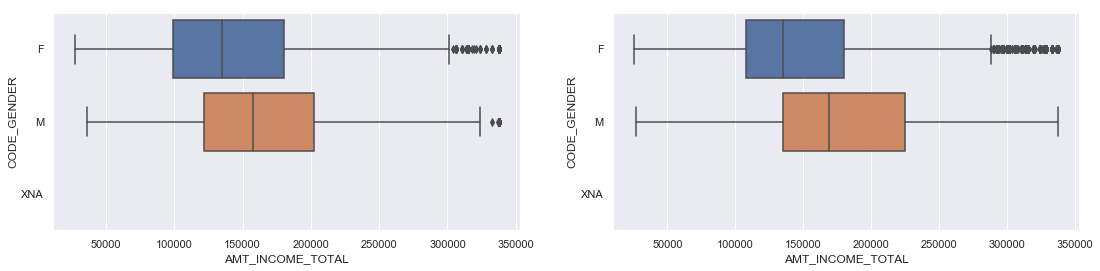

In [111]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x=target1.AMT_INCOME_TOTAL, y=target1.CODE_GENDER, ax=ax[0])
sns.boxplot(x=target0.AMT_INCOME_TOTAL, y=target0.CODE_GENDER,ax=ax[1])
plt.subplots_adjust(right=2.5)

In [112]:
target1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YE

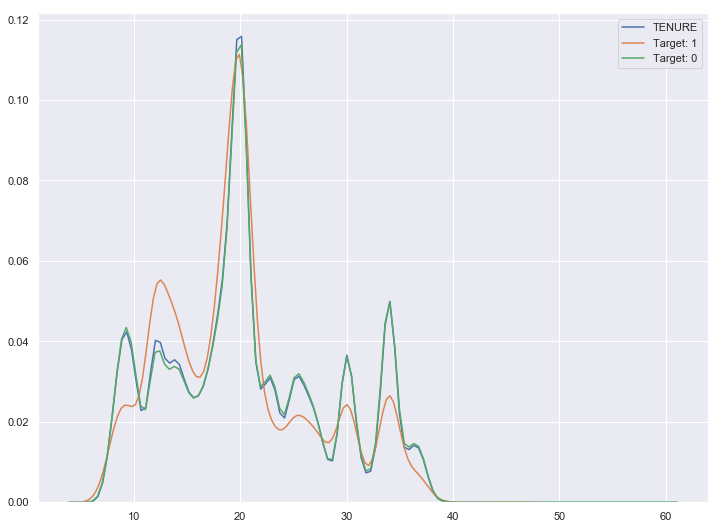

In [117]:
plt.figure(figsize=(12,9))
sns.kdeplot(appdata['TENURE'])
sns.kdeplot(target1['TENURE'],label="Target: 1")
sns.kdeplot(target0['TENURE'],label="Target: 0")

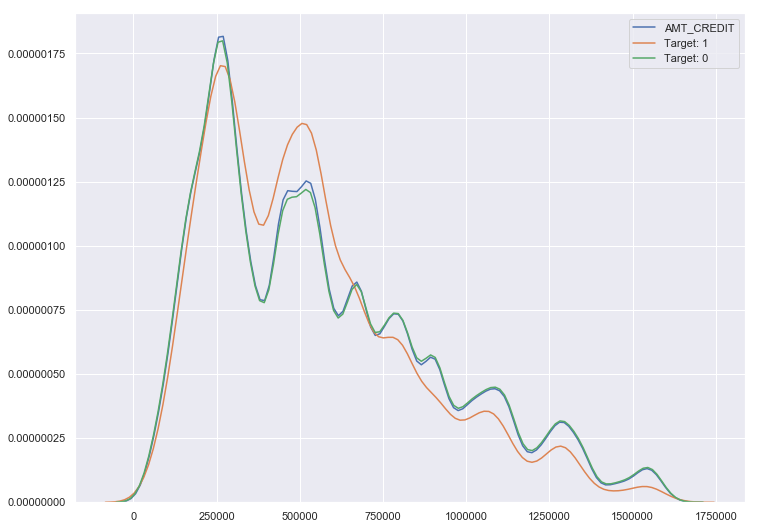

In [116]:
plt.figure(figsize=(12,9))
sns.kdeplot(appdata['AMT_CREDIT'])
sns.kdeplot(target1['AMT_CREDIT'],label="Target: 1")
sns.kdeplot(target0['AMT_CREDIT'],label="Target: 0")

#### Income Vs Employee Type

<Figure size 864x648 with 0 Axes>

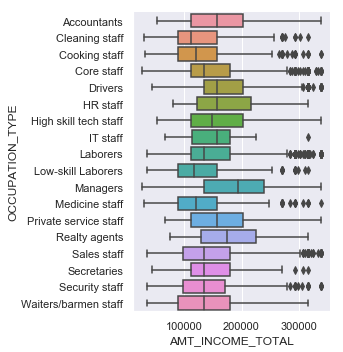

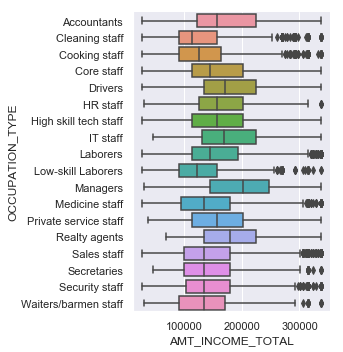

In [119]:
plt.figure(figsize=(12,9))
sns.catplot(x="AMT_INCOME_TOTAL", y="OCCUPATION_TYPE",kind="box", data=target1);
sns.catplot(x="AMT_INCOME_TOTAL", y="OCCUPATION_TYPE",kind="box", data=target0);

#### Income Vs Education Type 

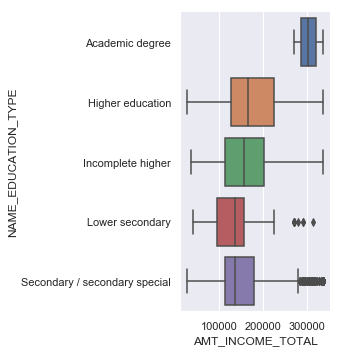

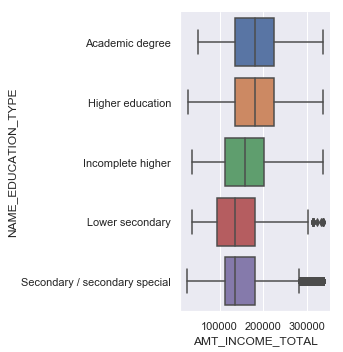

In [120]:
sns.catplot(x="AMT_INCOME_TOTAL", y="NAME_EDUCATION_TYPE",kind="box", data=target1);
sns.catplot(x="AMT_INCOME_TOTAL", y="NAME_EDUCATION_TYPE",kind="box", data=target0);

#### Income Vs. Family Status

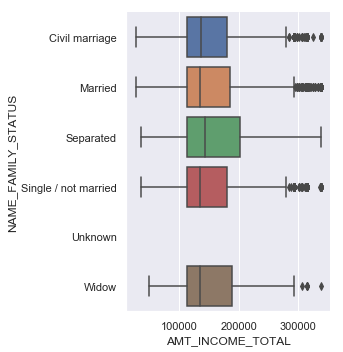

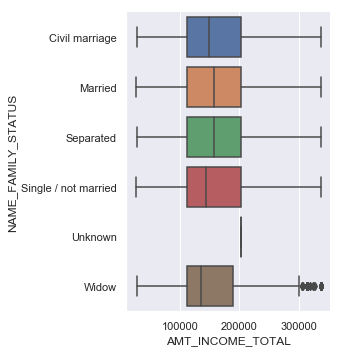

In [121]:
sns.catplot(x="AMT_INCOME_TOTAL", y="NAME_FAMILY_STATUS",kind="box", data=target1);
sns.catplot(x="AMT_INCOME_TOTAL", y="NAME_FAMILY_STATUS",kind="box", data=target0);

<Figure size 864x648 with 0 Axes>

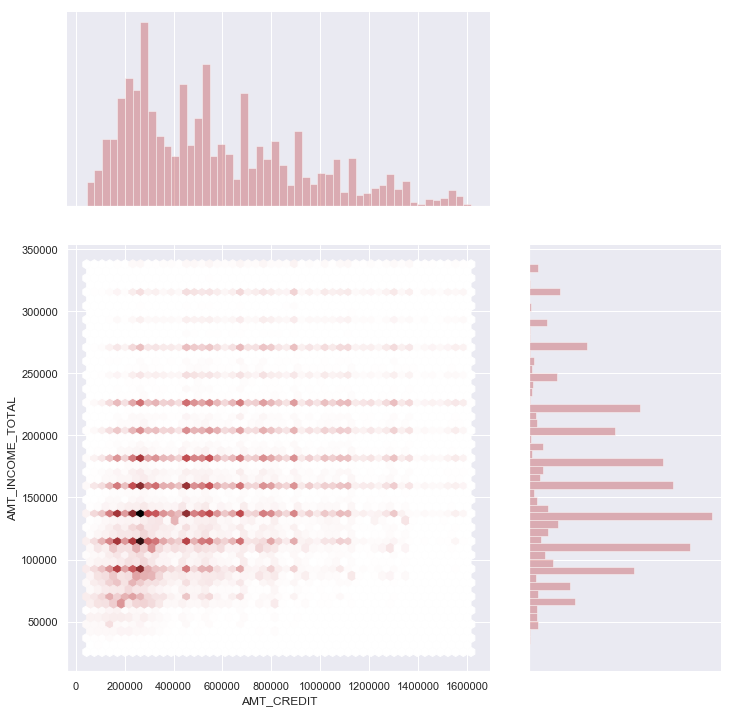

In [143]:
plt.figure(figsize=(12,9))
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", kind="hex",height=10, ratio=2,data=target0, color="r")

<Figure size 864x648 with 0 Axes>

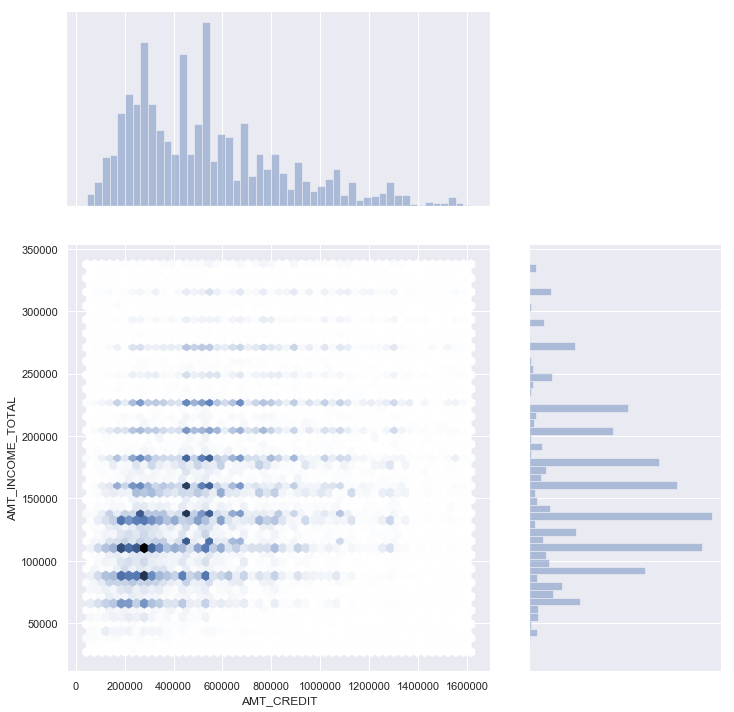

In [137]:
plt.figure(figsize=(12,9))
sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", kind="hex",height=10, ratio=2,data=target1)

<Figure size 864x648 with 0 Axes>

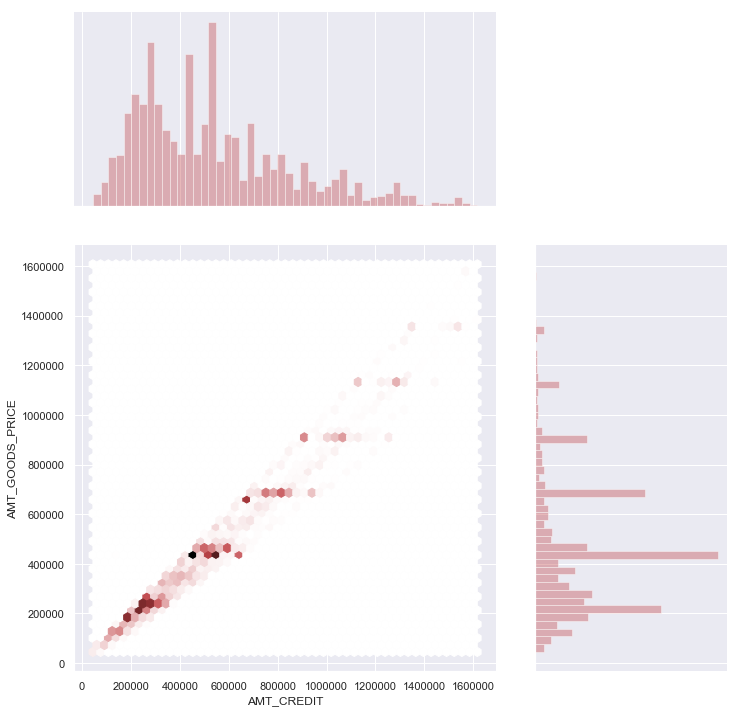

In [142]:
plt.figure(figsize=(12,9))
sns.jointplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", kind="hex",height=10, ratio=2,data=target1,color="r")

<Figure size 864x648 with 0 Axes>

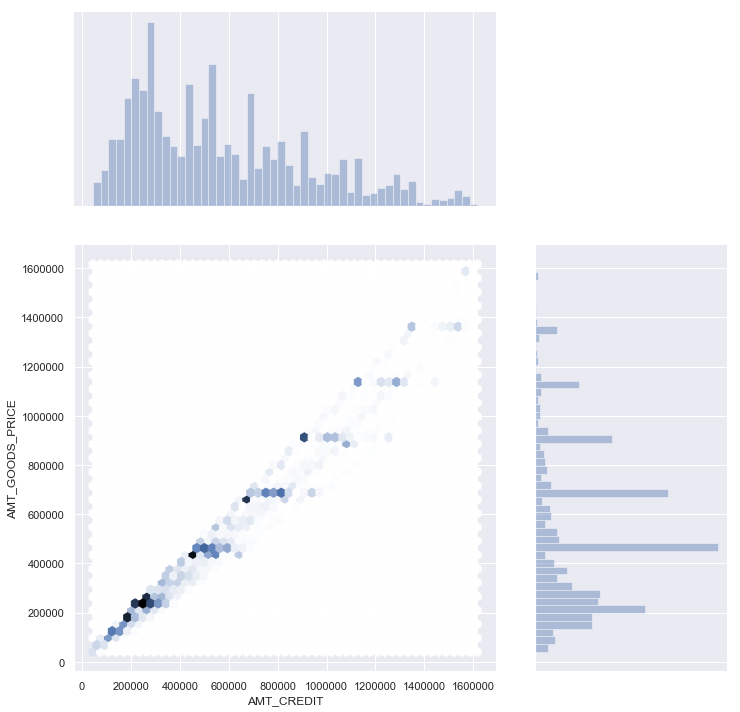

In [141]:
plt.figure(figsize=(12,9))
sns.jointplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", kind="hex",height=10, ratio=2,data=target0)

<Figure size 864x648 with 0 Axes>

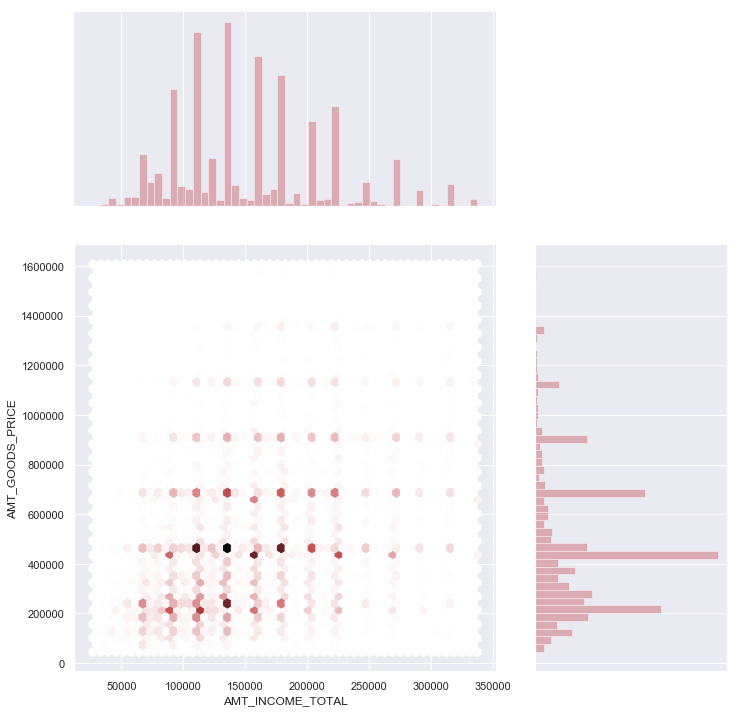

In [144]:
plt.figure(figsize=(12,9))
sns.jointplot(x="AMT_INCOME_TOTAL", y="AMT_GOODS_PRICE", kind="hex",height=10, ratio=2,data=target1,color="r")

<Figure size 864x648 with 0 Axes>

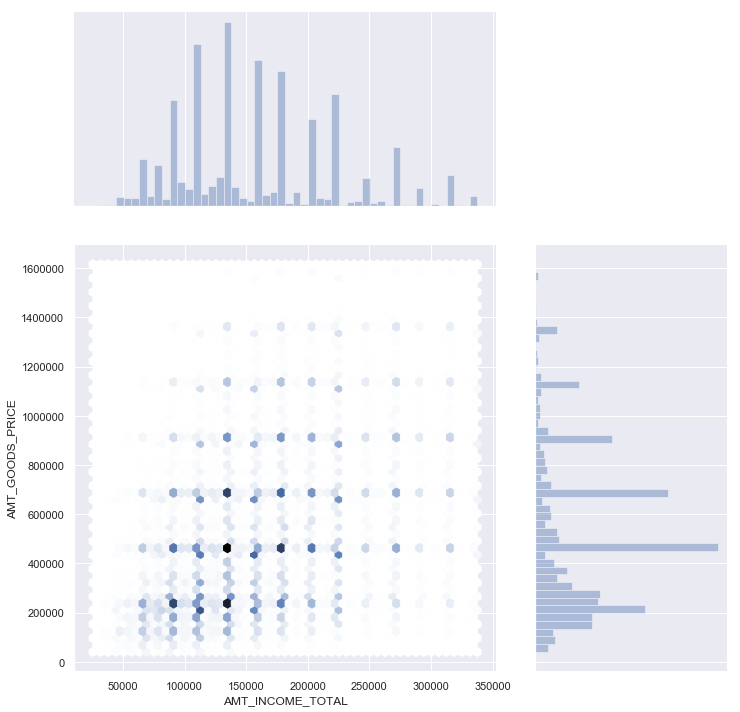

In [145]:
plt.figure(figsize=(12,9))
sns.jointplot(x="AMT_INCOME_TOTAL", y="AMT_GOODS_PRICE", kind="hex",height=10, ratio=2,data=target0,color="b")

#### Importing the Previous application data

In [146]:
prevapp = pd.read_csv("previous_application.csv")

In [147]:
prevapp.shape

(1670214, 37)

##### The dataset is huge and contains 16 lakh columns and 37 columns.

In [148]:
prevapp.columns # Lets go through the column names.

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [149]:
prevapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [151]:
percent_missing1 = prevapp.isna().mean().round(4) * 100

## Finding the missing value in each column percentage wise.

In [152]:
percent_missing1.sort_values(ascending=False)
columns_to_delete1 = percent_missing1[percent_missing >= 50].index
prevapp.drop(columns_to_delete1, axis=1, inplace=True) 

## removing the columns with greater than 50% missing value.

In [153]:
prevapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_TYP

#### Hence we have removed 4 columns from the dataframe where more than 50% data was missing.Again let's check the dataset for missing values greater than 13%.

In [154]:
percent_missing1 = prevapp.isna().mean().round(4) * 100

In [155]:
percent_missing1[percent_missing1 > 13].sort_values(ascending=False)

NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
CNT_PAYMENT                  22.29
AMT_ANNUITY                  22.29
dtype: float64

In [156]:
prevapp['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

##### We can see that 820405 values are missing. However, since it's a categorical column, we can't impute the NA values by mean, median or mode.

In [157]:
prevapp['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [158]:
prevapp['NFLAG_INSURED_ON_APPROVAL'].isnull().value_counts()

False    997149
True     673065
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64